### Imports

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
from model.generator import Generator
import config.config as config

### Add Monet Style to Image

* To add Monet style to the arbitrary image we only need Generator part of the network (gen_M model)

In [2]:
checkpoint = torch.load("checkpoints/last_checkpoint.ckpt")

In [4]:
model = Generator(
    img_channels=config.IN_CHANNELS, 
    num_features=config.NUM_FEATURES, 
    num_residuals=config.NUM_RESIDUALS
).to(config.DEVICE)
model.load_state_dict(checkpoint["gen_M_state_dict"])

<All keys matched successfully>

In [36]:
img = Image.open("test_images/0a284dbed0.jpg")
img = config.TRANSFORMS(img)
img = img.unsqueeze(axis=0)
print(f"Image shape: {img.shape}")

generated_img = model(img)
print(f"Generated image shape: {generated_img.shape}")
generated_img = generated_img.squeeze(axis=0)

Image shape: torch.Size([1, 3, 256, 256])
Generated image shape: torch.Size([1, 3, 256, 256])


In [37]:
generated_img = generated_img.detach().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


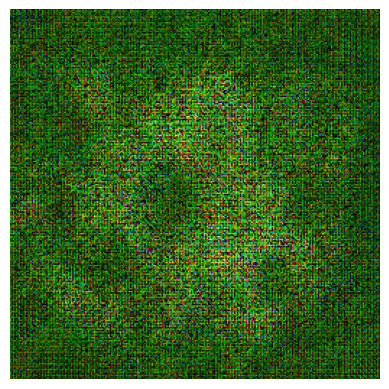

In [38]:
generated_img = generated_img.detach().numpy()
# generated_img = generated_img * 255
image_array = np.transpose(generated_img, (1, 2, 0))

plt.imshow(image_array)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [3]:
checkpoint = torch.load("/home/user/Downloads/latest_net_G.pth")

In [4]:
model = Generator(
    img_channels=config.IN_CHANNELS, 
    num_features=config.NUM_FEATURES, 
    num_residuals=config.NUM_RESIDUALS
).to(config.DEVICE)